## RECTIFICADOR DE PRECISION
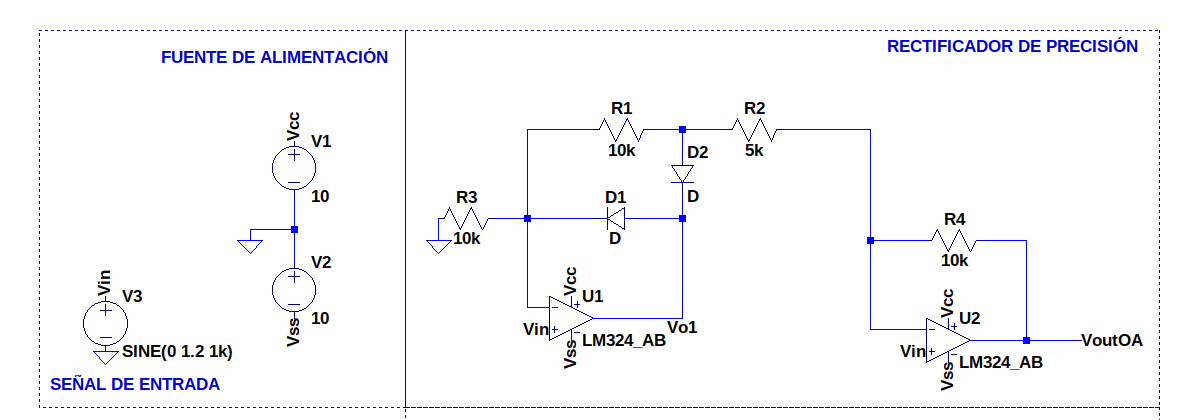

Columnas detectadas: Index(['time', 'V(vin)', 'V(vo1)', 'V(vout)'], dtype='object')


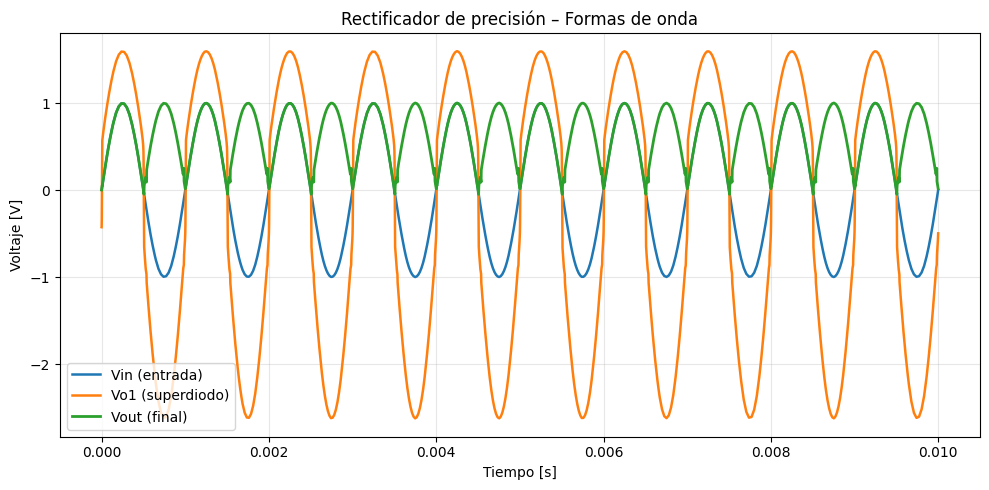

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------
# 1) Cargar datos desde el .txt exportado
# ---------------------------------------
FILE = "precis_rectif_tran.txt"

df = pd.read_csv(FILE, sep="\t")
df.columns = df.columns.str.strip()

# Nombres típicos de LTspice: verificar
print("Columnas detectadas:", df.columns)

# Ajusta estos nombres si difieren en tu archivo:
VIN_COL  = "V(vin)"
VO1_COL  = "V(vo1)"
VOUT_COL = "V(vout)"

# -------------------------------
# 2) Graficar las tres señales
# -------------------------------
plt.figure(figsize=(10,5))

plt.plot(df["time"], df[VIN_COL],  label="Vin (entrada)", linewidth=1.8)
plt.plot(df["time"], df[VO1_COL],  label="Vo1 (superdiodo)", linewidth=1.8)
plt.plot(df["time"], df[VOUT_COL], label="Vout (final)", linewidth=2.0)

plt.title("Rectificador de precisión – Formas de onda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


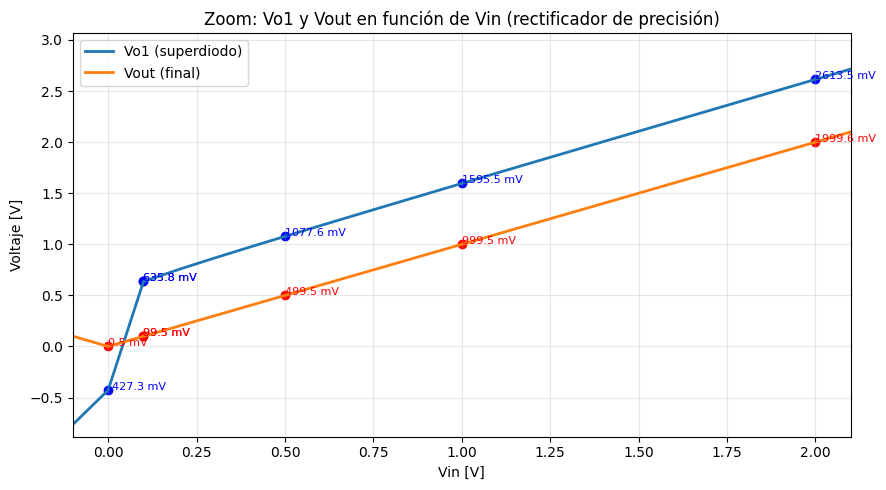

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------
# 1) Cargar archivo exportado LTspice
# -----------------------------------
FILE = "precis_rect_dc.txt"
df = pd.read_csv(FILE, sep="\t")
df.columns = df.columns.str.strip()

# Ajusta si tus nombres difieren
VIN_COL  = "V(vin)"    # eje X
VO1_COL  = "V(vo1)"
VOUT_COL = "V(vout)"

# -----------------------------------
# 2) Valores donde hacer zoom
# -----------------------------------
VIN_POINTS = [0.01, 0.05, 0.1, 0.5, 1, 2]  # en Volt
zoom_x = []
zoom_y = []

# -----------------------------------
# 3) Curvas completas
# -----------------------------------
plt.figure(figsize=(9,5))

plt.plot(df[VIN_COL], df[VO1_COL], label="Vo1 (superdiodo)", linewidth=2)
plt.plot(df[VIN_COL], df[VOUT_COL], label="Vout (final)", linewidth=2)

# -----------------------------------
# 4) Marcar puntos de interés
# -----------------------------------
vin_arr = np.array(df[VIN_COL])

for vp in VIN_POINTS:
    idx = np.argmin(np.abs(vin_arr - vp))

    # extraer Vo1 y Vout en ese punto
    x = df[VIN_COL].iloc[idx]
    y1 = df[VO1_COL].iloc[idx]
    y2 = df[VOUT_COL].iloc[idx]

    zoom_x += [x, x]
    zoom_y += [y1, y2]

    # marcar Vo1
    plt.scatter(x, y1, color="blue")
    plt.text(x, y1, f"{y1*1e3:.1f} mV", fontsize=8, color="blue")

    # marcar Vout
    plt.scatter(x, y2, color="red")
    plt.text(x, y2, f"{y2*1e3:.1f} mV", fontsize=8, color="red")

# -----------------------------------
# 5) ZOOM AUTOMÁTICO
# -----------------------------------
plt.xlim(min(zoom_x) - 0.1, max(zoom_x) + 0.1)

# margen vertical pequeño
margin_y = (max(zoom_y)-min(zoom_y)) * 0.15
plt.ylim(min(zoom_y) - margin_y, max(zoom_y) + margin_y)

# -----------------------------------
# 6) Estética del gráfico
# -----------------------------------
plt.title("Zoom: Vo1 y Vout en función de Vin (rectificador de precisión)")
plt.xlabel("Vin [V]")
plt.ylabel("Voltaje [V]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



## COMPARACION CON RECTIFICADOR CONVENCIONAL

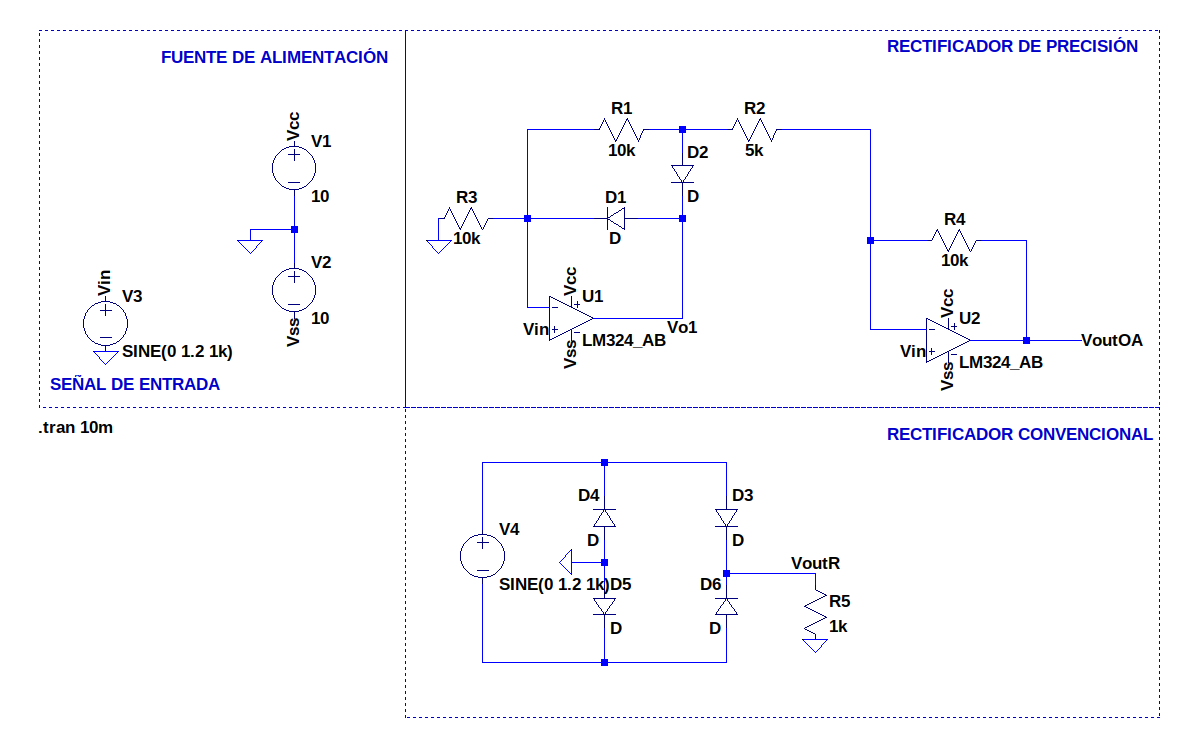

Columnas detectadas: Index(['time', 'V(vin)', 'V(voutoa)', 'V(voutr)'], dtype='object')


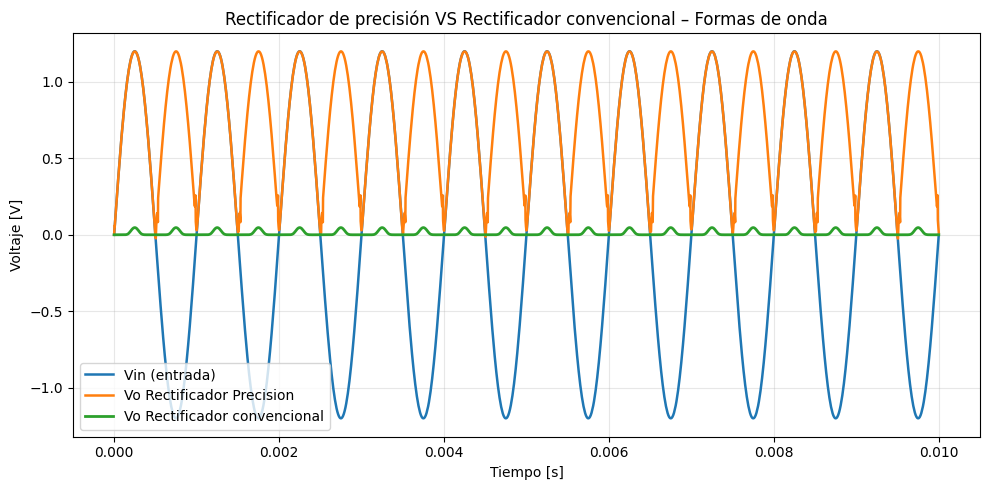

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------
# 1) Cargar datos desde el .txt exportado
# ---------------------------------------
FILE = "comp_rect.txt"

df = pd.read_csv(FILE, sep="\t")
df.columns = df.columns.str.strip()

# Nombres típicos de LTspice: verificar
print("Columnas detectadas:", df.columns)

# Ajusta estos nombres si difieren en tu archivo:
VIN_COL  = "V(vin)"
VO_OA_COL  = "V(voutoa)"
VO_R_COL = "V(voutr)"

# -------------------------------
# 2) Graficar las tres señales
# -------------------------------
plt.figure(figsize=(10,5))

plt.plot(df["time"], df[VIN_COL],  label="Vin (entrada)", linewidth=1.8)
plt.plot(df["time"], df[VO_OA_COL],  label="Vo Rectificador Precision", linewidth=1.8)
plt.plot(df["time"], df[VO_R_COL], label="Vo Rectificador convencional", linewidth=2.0)

plt.title("Rectificador de precisión VS Rectificador convencional – Formas de onda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()